This file will be representing the example of 5.1.4 from scratch (Linear regression) for better understanding.

This file will consist of surveral parts.
1) Generate 100 synthetic points
2) Initialize weight w and bias b (y=wx)
3) Compute MSE and its gradient manually
4) Ran batch gradient descent for 100 epochs with learning rate 0.01.

In [ ]:
import numpy as np

np.random.seed(42)

x = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, x.shape)
y = 2 * x + 1 + noise ###Predction function: y = 2x + 1 + noise

In [ ]:
w = np.random.randn() ### Initialize weight
b = np.random.randn() ### Initialize bias

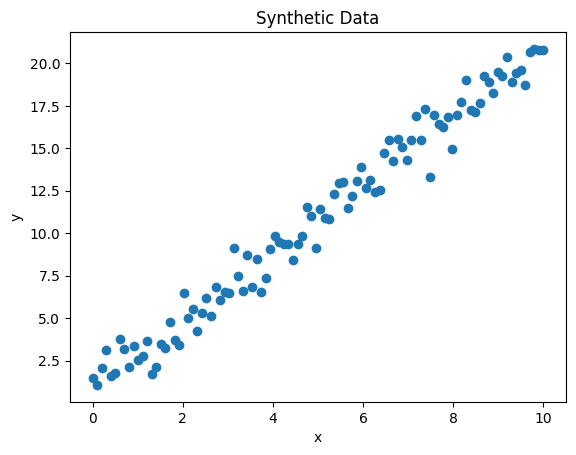

-1.4153707420504142 -0.42064532276535904


In [ ]:
### Plot the synthetic data (For reference)

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()
print(w, b)

MSE loss function

In [7]:
def compute_MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

Gradient function

In [ ]:
def compute_gradient(x, y, w, b):
    N = len(y)
    y_pred = w * x + b
    error = y_pred - y
    
    ### For the following, you have to compute manually first before coding
    dw = (2/N) * np.dot(error, x) ### After partial differentiation with w
    db = (2/N) * np.sum(error) ### After partial differentiation with b
    return dw, db

Training loop

In [ ]:
learning_rate = 0.01
num_epochs = 1000
loss_history = []

### Training loop
for epoch in range(num_epochs):
    y_pred = w * x +b
    loss = compute_MSE(y, y_pred)
    loss_history.append(loss)

    dw,db = compute_gradient(x, y, w, b)
    w = w - learning_rate * dw
    b = b - learning_rate * db

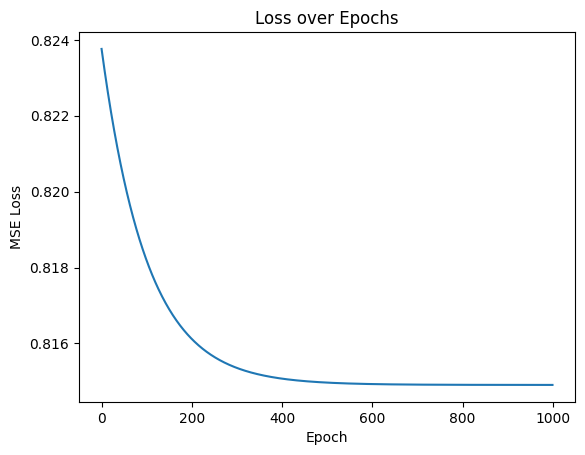

2.013987063351602 0.8258982673700371


In [ ]:
import matplotlib.pyplot as plt
### Plot loss history over epochs
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss over Epochs')
plt.show()
print(w, b)

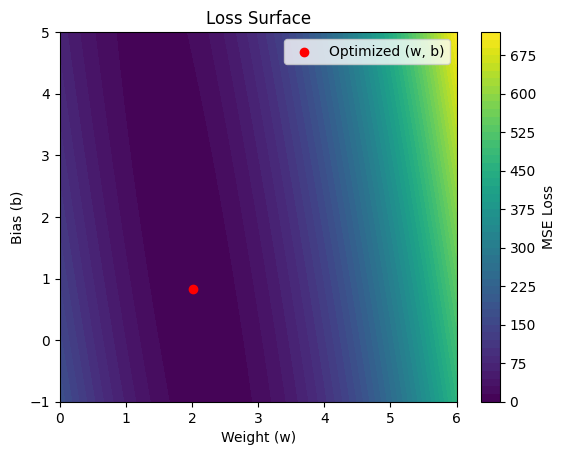

In [ ]:
ws = np.linspace(0, 6, 100) ### Range of weight values
bs = np.linspace(-1, 5, 100) ### Range of bias values
W, B = np.meshgrid(ws, bs) ### Create a grid of weight and bias values

### Compute loss surface
Z = np.zeros(W.shape)
for i in range(W.shape[0]): ### i refer to row (bias)
    for j in range(W.shape[1]): ### j refer to column (weight)
        y_pred = W[i, j] * x + B[i, j]
        Z[i, j] = compute_MSE(y, y_pred)

### 2D Surface plot
plt.contourf(W, B, Z, levels=50, cmap='viridis')
plt.colorbar(label='MSE Loss')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Loss Surface')
plt.scatter(w, b, color='red', label='Optimized (w, b)')
plt.legend()
plt.show()

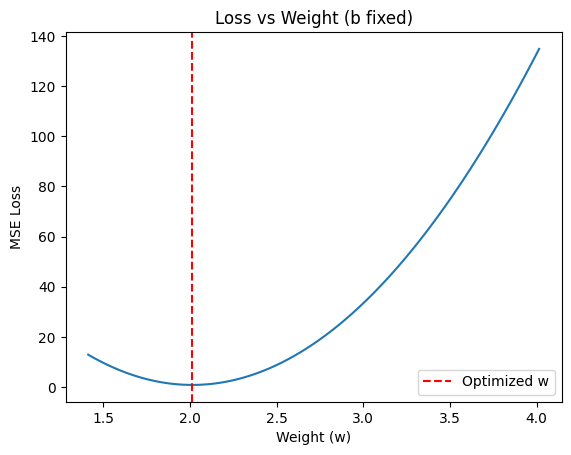

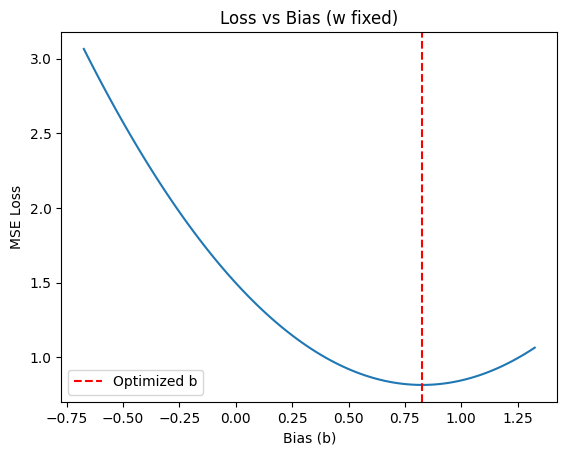

In [ ]:
w_opt = w
b_opt = b

w_vals = np.linspace(w_opt - 0.6, w_opt + 2, 100) ### Change range if necessary
b_vals = np.linspace(b_opt - 1.5, b_opt + 0.5, 100) ### Change range if necessary

def mse_loss(x, y, w, b):
    y_pred = w * x + b
    return compute_MSE(y, y_pred)

losses_w = [mse_loss(x,y,w,b) for w in w_vals]
losses_b = [mse_loss(x,y,w,b) for b in b_vals]

plt.plot(w_vals, losses_w)
plt.xlabel('Weight (w)')
plt.ylabel('MSE Loss')
plt.title('Loss vs Weight (b fixed)')
plt.axvline(w_opt, color='red', linestyle='--', label='Optimized w')
plt.legend()
plt.show()

plt.plot(b_vals, losses_b)
plt.xlabel('Bias (b)')
plt.ylabel('MSE Loss')
plt.title('Loss vs Bias (w fixed)')
plt.axvline(b_opt, color='red', linestyle='--', label='Optimized b')
plt.legend()
plt.show()

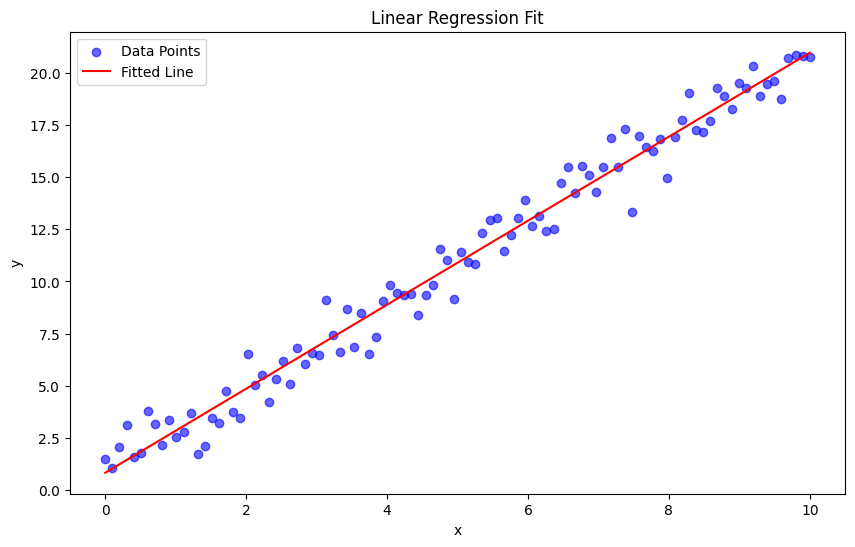

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Visualize the fitted line against the data

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = "blue", alpha = 0.6, label='Data Points')

x_line = np.linspace(x.min(), x.max(), 100)
y_line = w_opt * x_line + b_opt

plt.plot(x_line, y_line, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


That is the whole framework for linear regression. Including all weights, gradients, training loop. Please be aware that the weight decay was not included, so this cannot prevent overfitting. We will cover that in the later module.